# **STEP 1: Data Collection**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Name
# ID
# Kaggle acount

# TL;Dr

#  EDA – Essential Data Analysis 

In [2]:
# # instalations
# # install the `numpy` library with `pip install`
# !pip install numpy

# !pip install plotly==5.3.1 # support image export
# #!pip install pandas_profiling # old version use ydata_profiling
# !pip install ydata_profiling
# !pip install --upgrade plotly
# !pip install pyyaml==5.4.1

In [3]:
# Essentials
import math
import numpy as np
import pandas as pd
import seaborn as sns # draw regression joint plot
import matplotlib.pyplot as plt
%matplotlib inline

# import px and create pie charts for each categorical feature
from plotly import express as px
# create pie charts subplots of the categorical features
import plotly.graph_objects as go # create pie charts subplots of the categorical features
from plotly.subplots import make_subplots

# Linear Regression
import sklearn
from sklearn import metrics # calculate MSE and RMSE
# from sklearn import datasets # TODO check if neeed load datasets
from sklearn import pipeline, preprocessing # standardize the features and run SGD on the data
from sklearn import linear_model # train with NE
from sklearn import model_selection # split to train and test
from sklearn import neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [4]:
!python -V

Python 3.7.12


In [5]:
# !pip list

# **STEP 2: Data Exploration**

In [6]:
# Load and show a taste of the data
titanic_train_original = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test_original = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_train_original.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Explaining the data after some research:**

1. **PassengerId**: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
2. **Survived**: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.
3. **Pclass**: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
4. **Name**: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.
5. **Sex**: Passenger's sex. It's either Male or Female.
6. **Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
7. **Sibsp**: Number of siblings / spouses aboard the Titanic.
    * The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
8. **Parch**: Number of parents / children aboard the Titanic.
    * The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
9. **Ticket**: Ticket number.
10. **Fare**: How much money the passenger has paid for the travel journey.
11. **Cabin**: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked**: Port from where the particular passenger was embarked/boarded.

### **Continuing to explore the data:**

In [7]:
titanic_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_train_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_train_original.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
#if nan exists in columns
titanic_train_original.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
#sum the number of nan values in each column ('feature')
titanic_train_original.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Current conclusions:**

    1. There are a total of 891 lines in the train data
    2. We have 177 null values in Age -> we can fill it up with the mean age in order not to "disort" the data
    3. We have 687 null values in Cabin -> To much missing data, droping this feature.
    4. We have 2 null values in Embarked -> Will fill up randomly.
    5. No real connection between 'PassengerId' feature and the chance of survival. -> droping this feature.
    6. The name of the passanger dosnt change his chance of survival. -> droping this feature.
    7. The 'Ticket' feature dosnt hold any data that will help us to predict the chance of survival. -> droping this feature.
    
 

In [12]:
# Load the Titanic dataset copy 
altered_titanic_df = titanic_train_original.copy()


# Calculate mean age
mean_age = np.mean(altered_titanic_df['Age'])
# Fill null values with mean age
altered_titanic_df['Age'].fillna(mean_age, inplace=True)


# Get possible values for Embarked
possible_values = altered_titanic_df['Embarked'].dropna().unique()
# Replace null values with random values from possible_values
altered_titanic_df['Embarked'].fillna(value=np.random.choice(possible_values), inplace=True)


# Drop the unnecessary columns
altered_titanic_df = altered_titanic_df.drop('Cabin', axis=1)
altered_titanic_df = altered_titanic_df.drop('Name', axis=1)
altered_titanic_df = altered_titanic_df.drop('PassengerId', axis=1)
altered_titanic_df = altered_titanic_df.drop('Ticket', axis=1)

#sum the number of nan values in each column ('feature')
print(altered_titanic_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [13]:
altered_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### **Continuing to explore the data:**
    
    Checking for corelations between 'Survived' and other features    

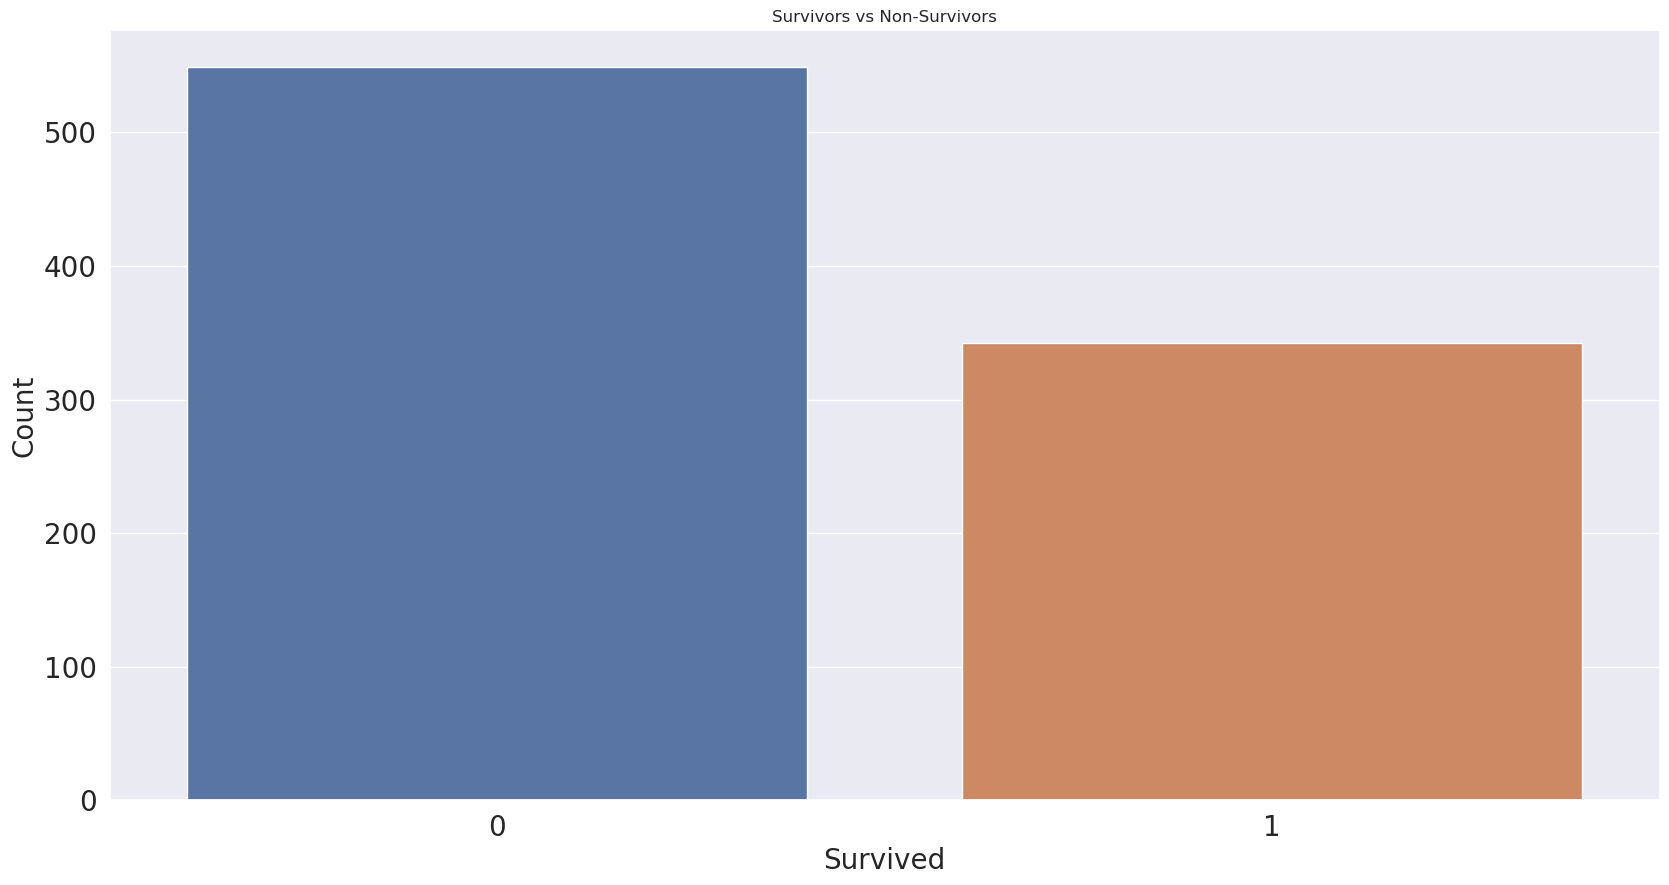

Survived    0.383838
dtype: float64


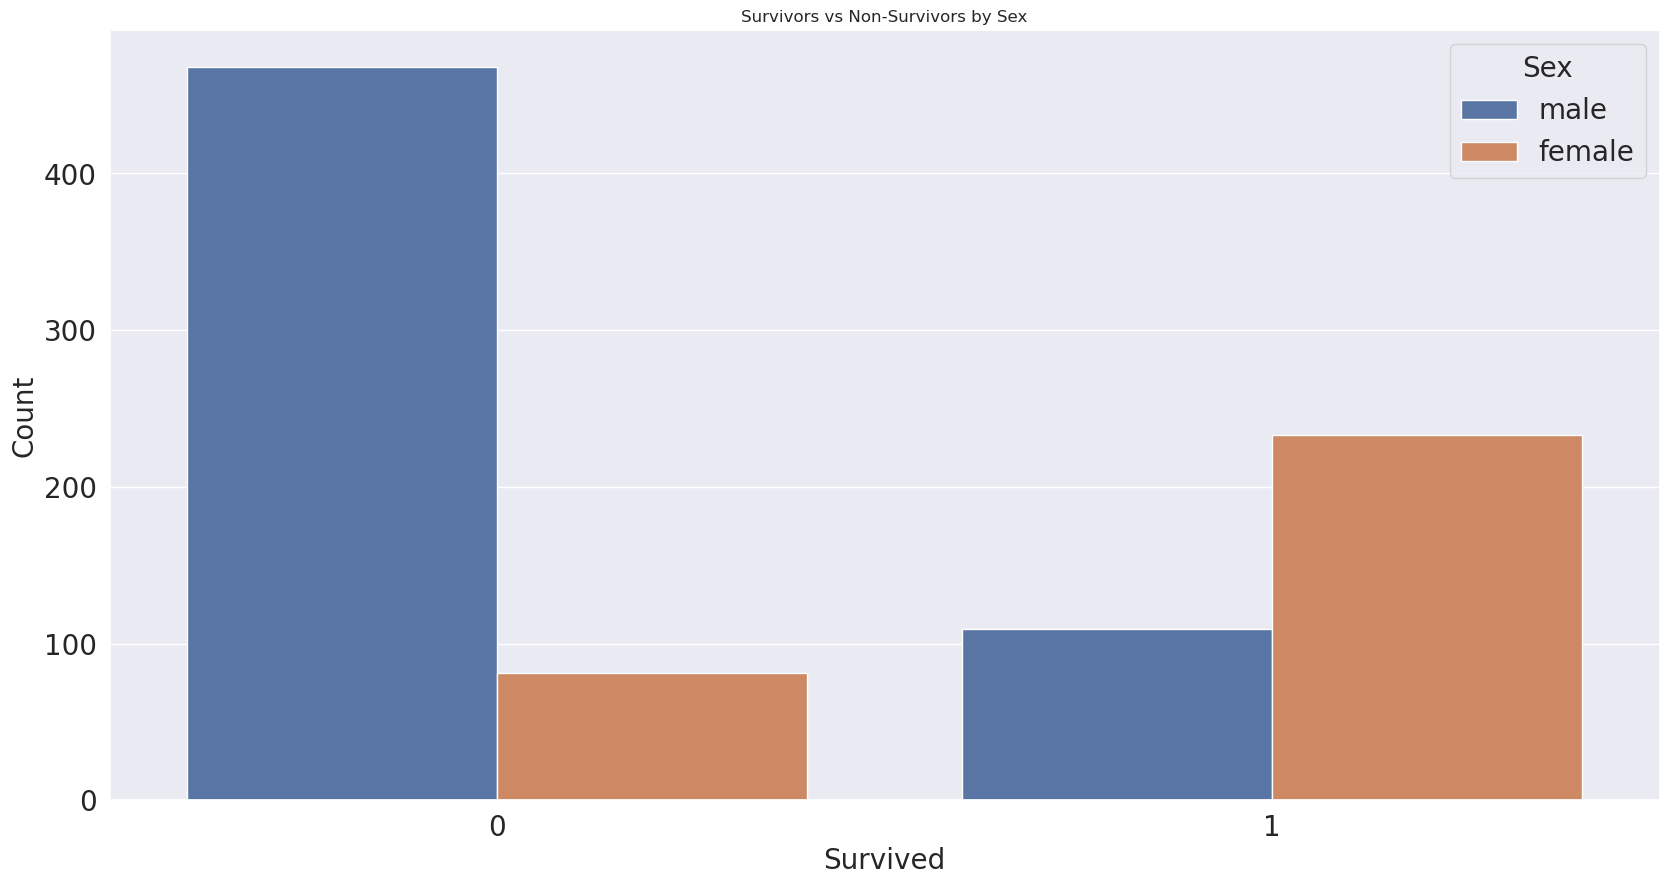

      Sex  Survived
0  female  0.742038
1    male  0.188908


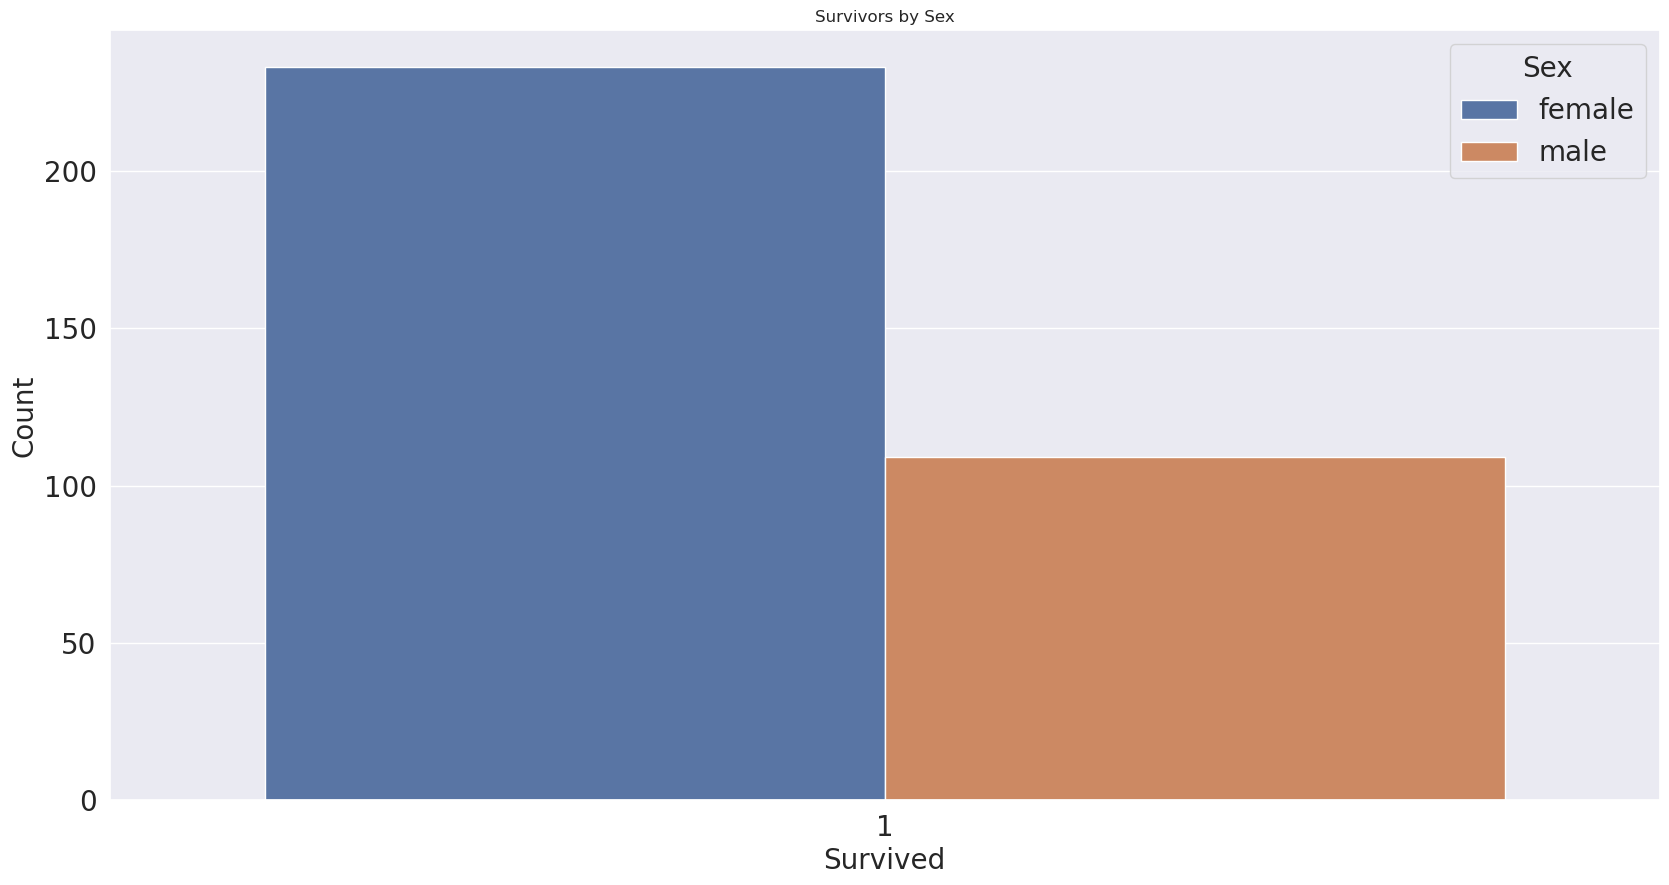

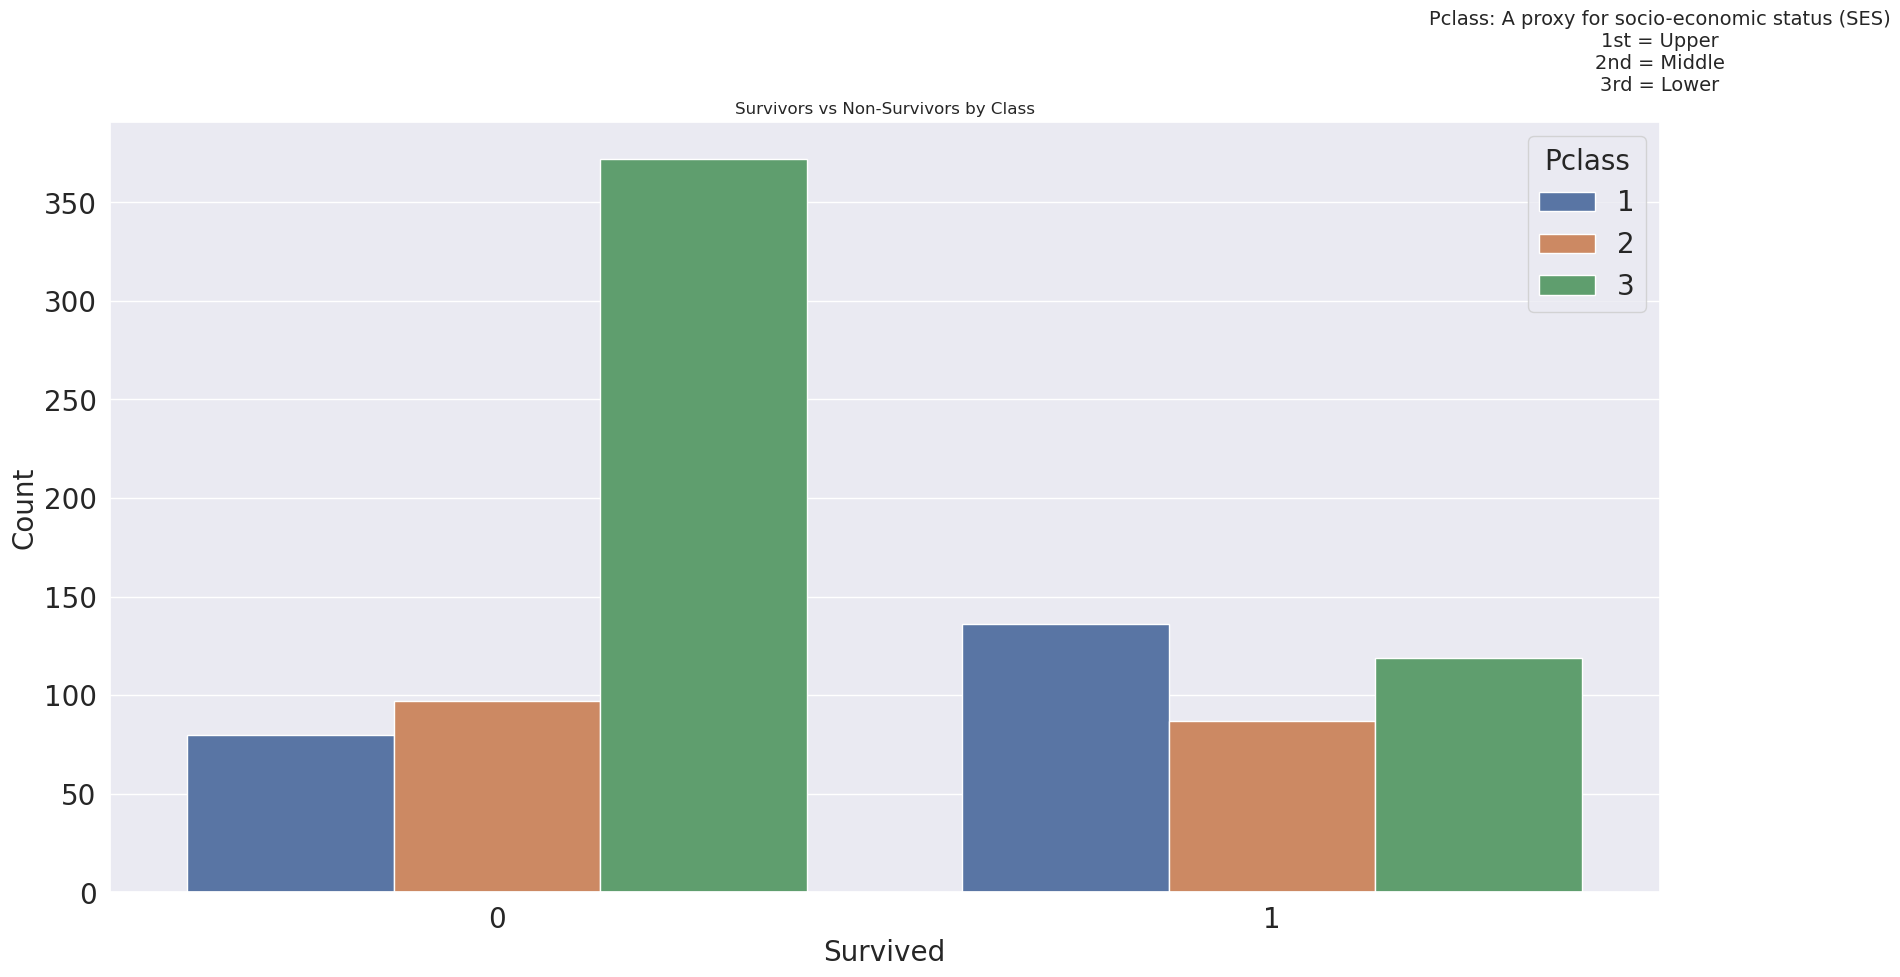

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


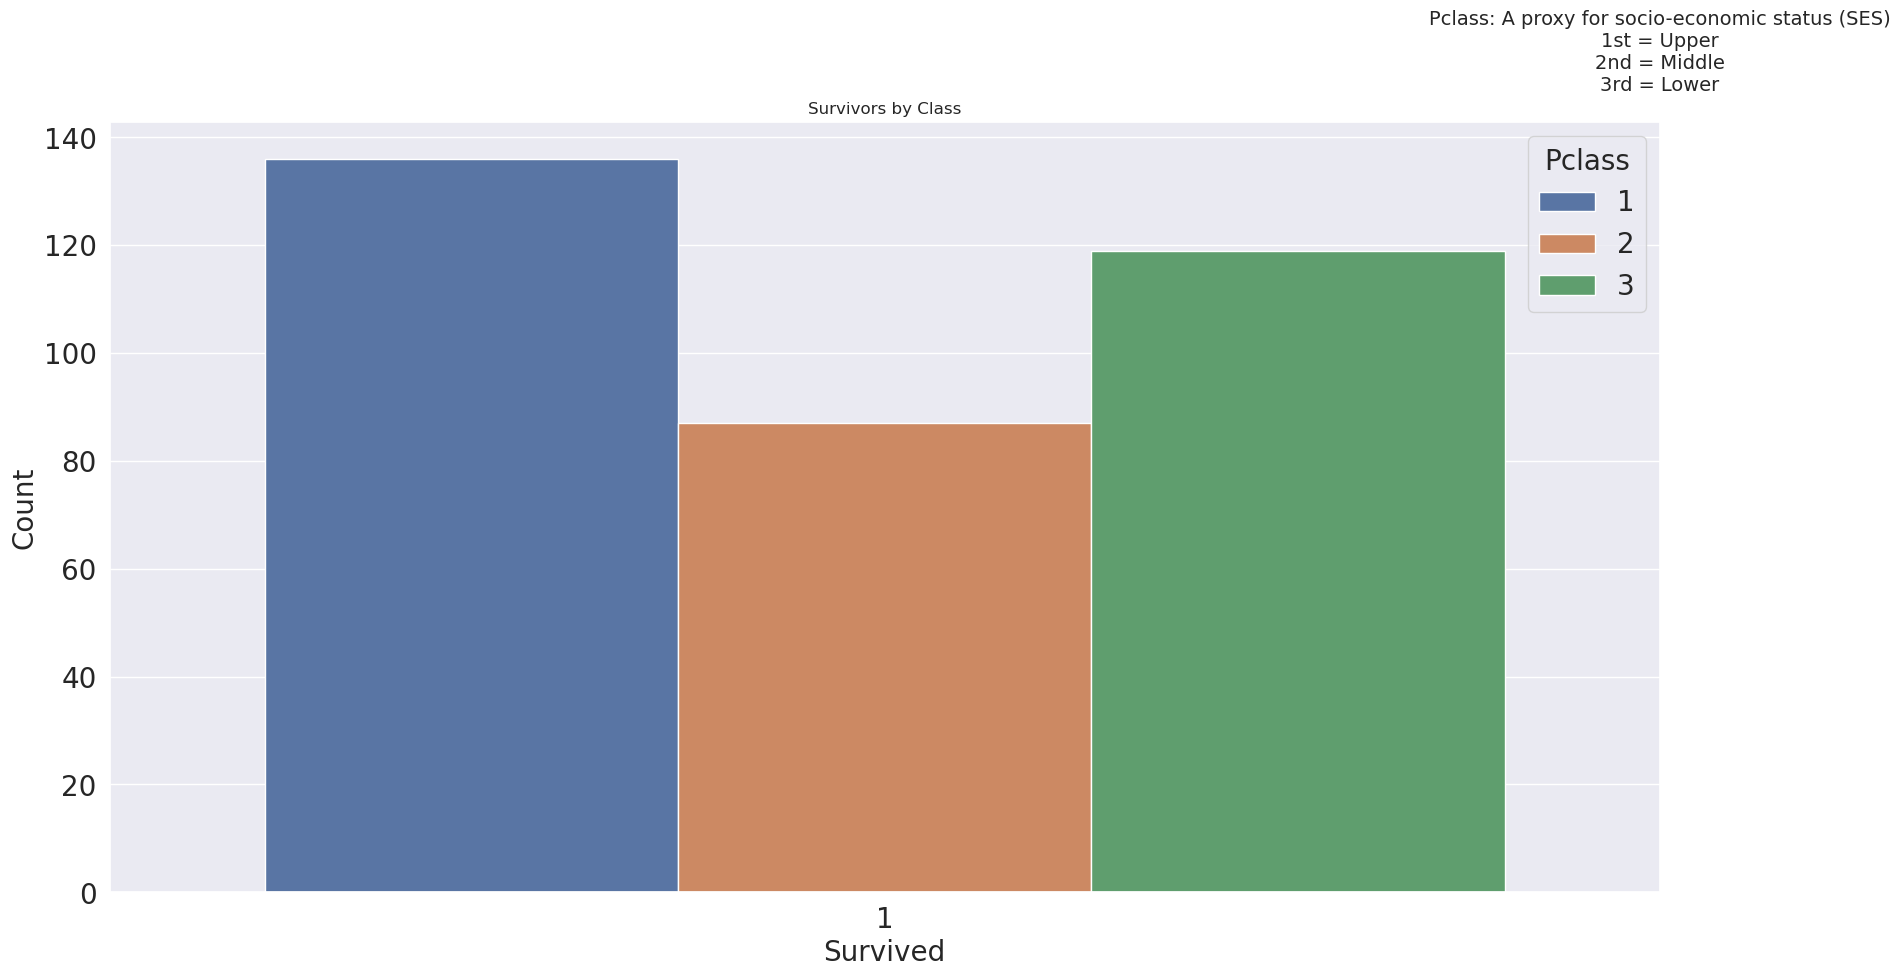

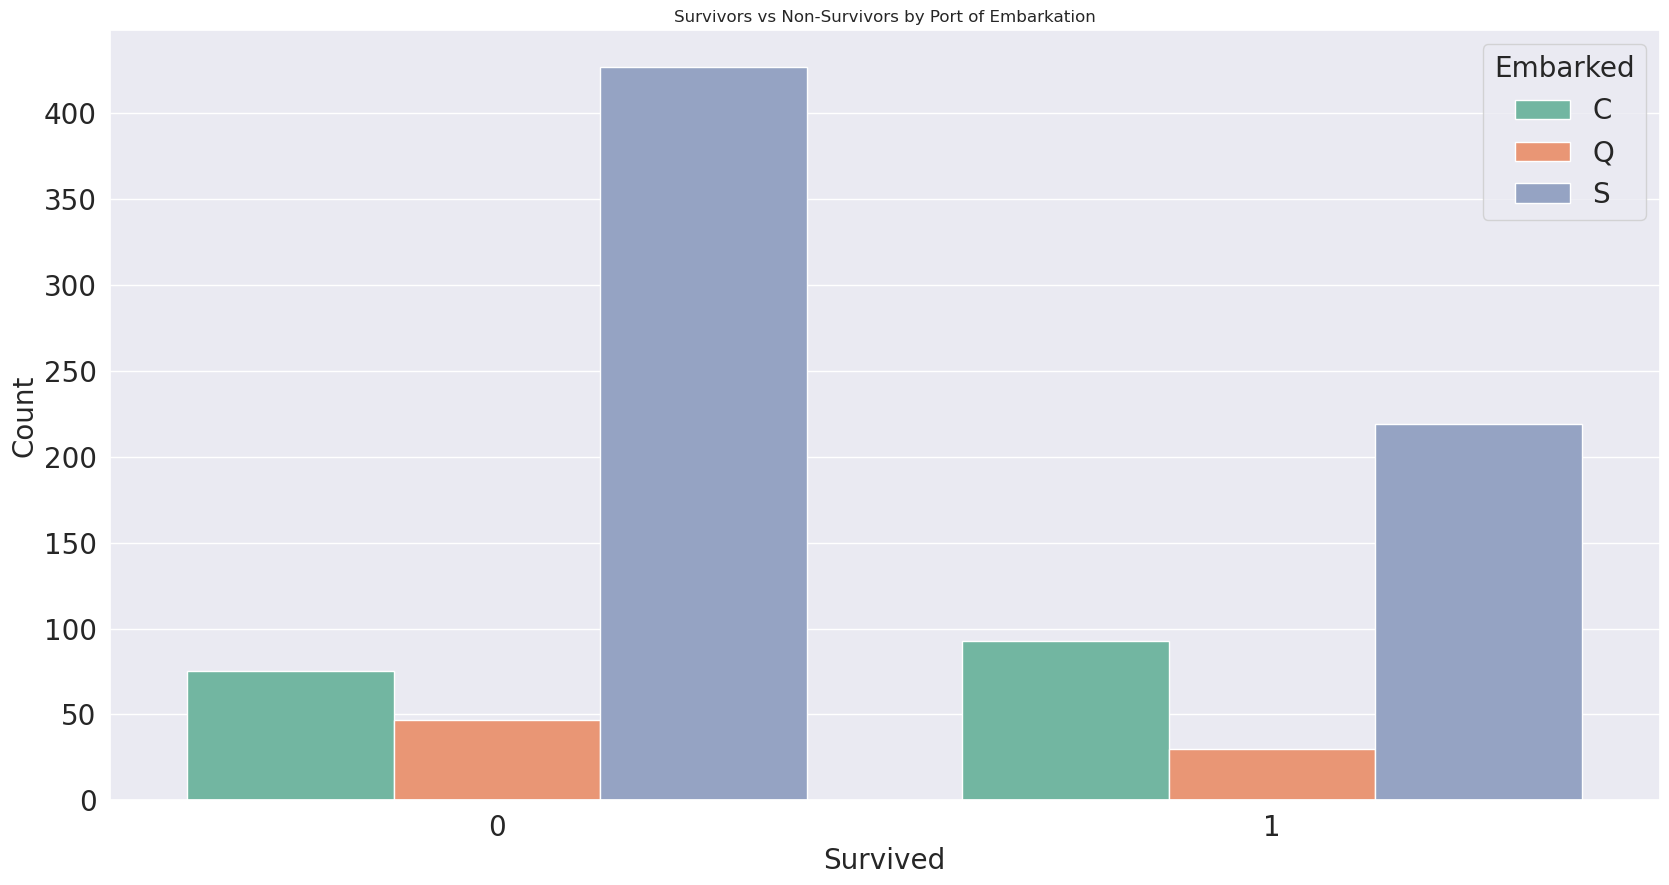

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


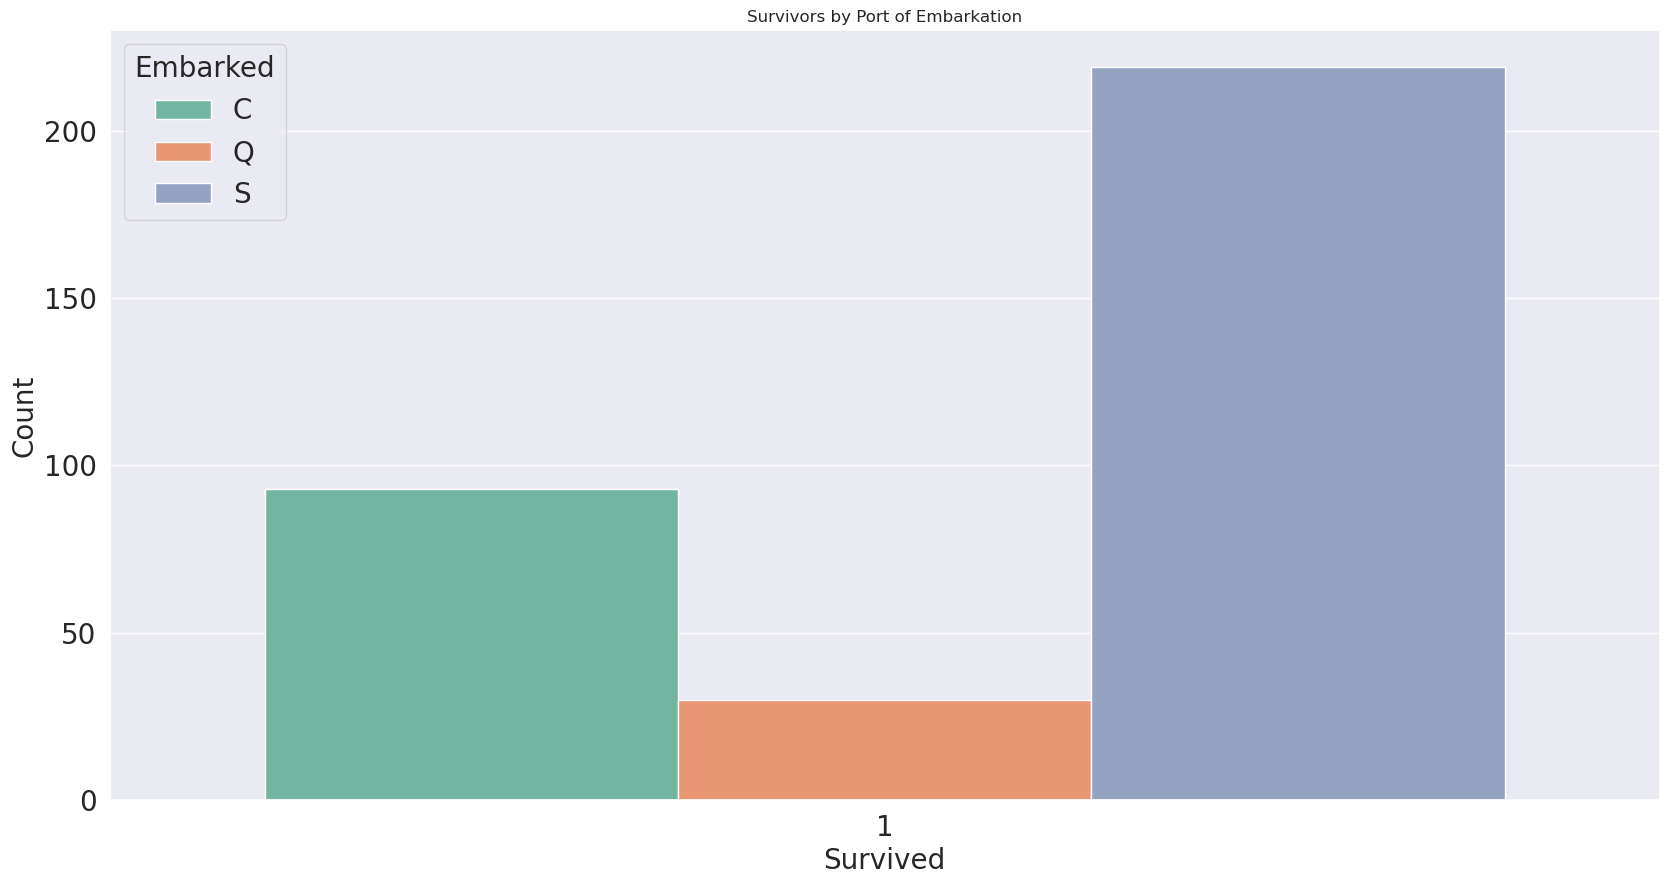

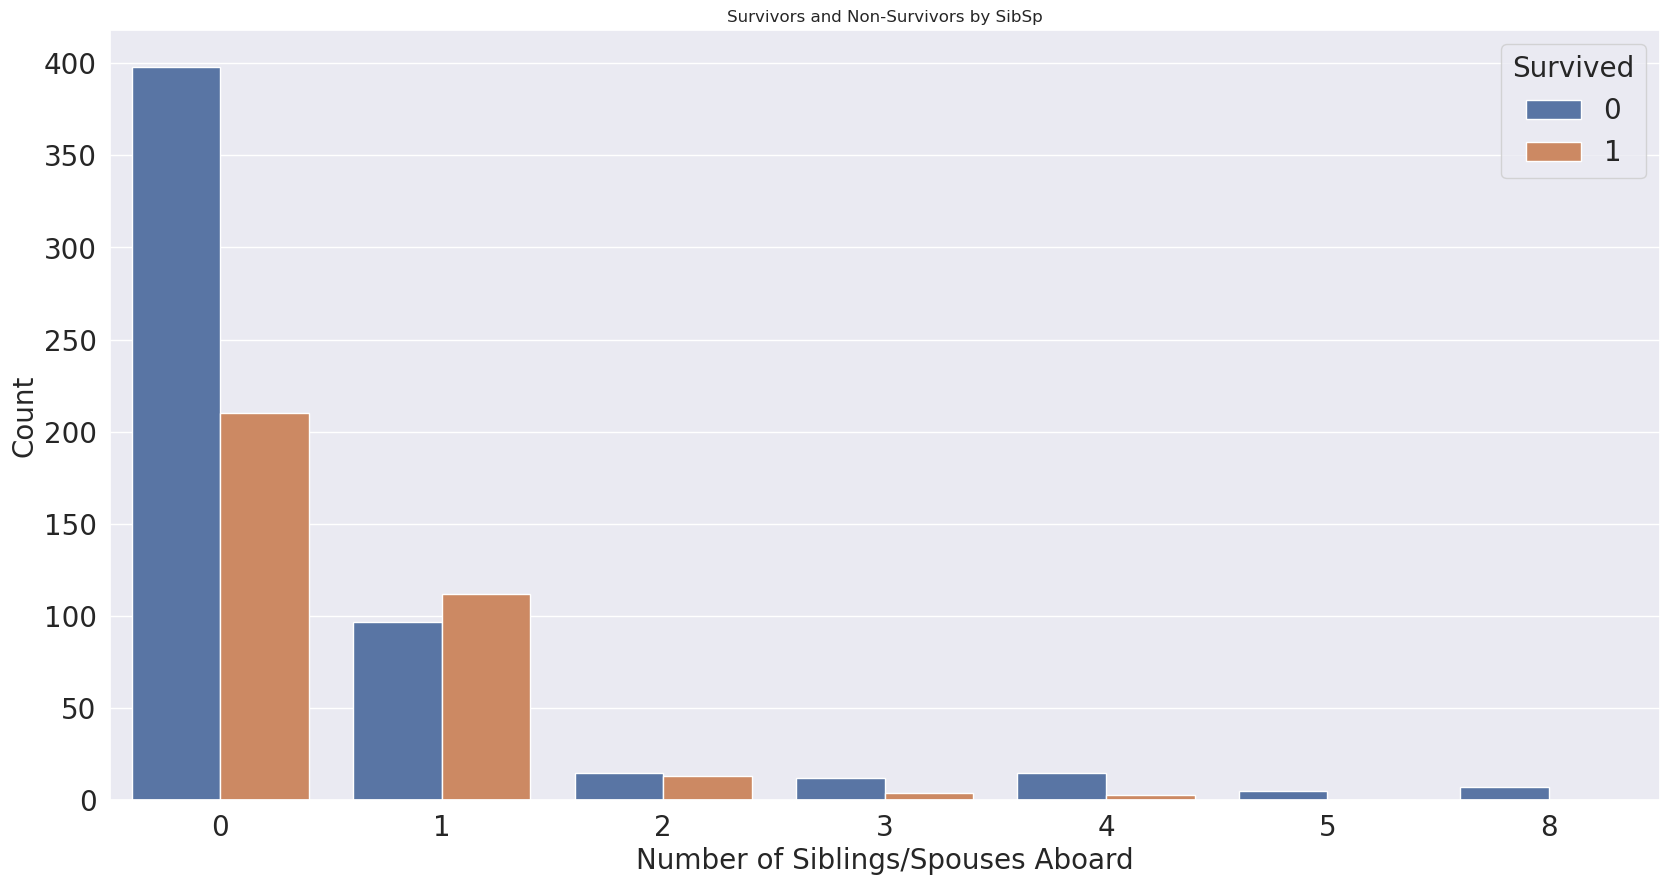

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


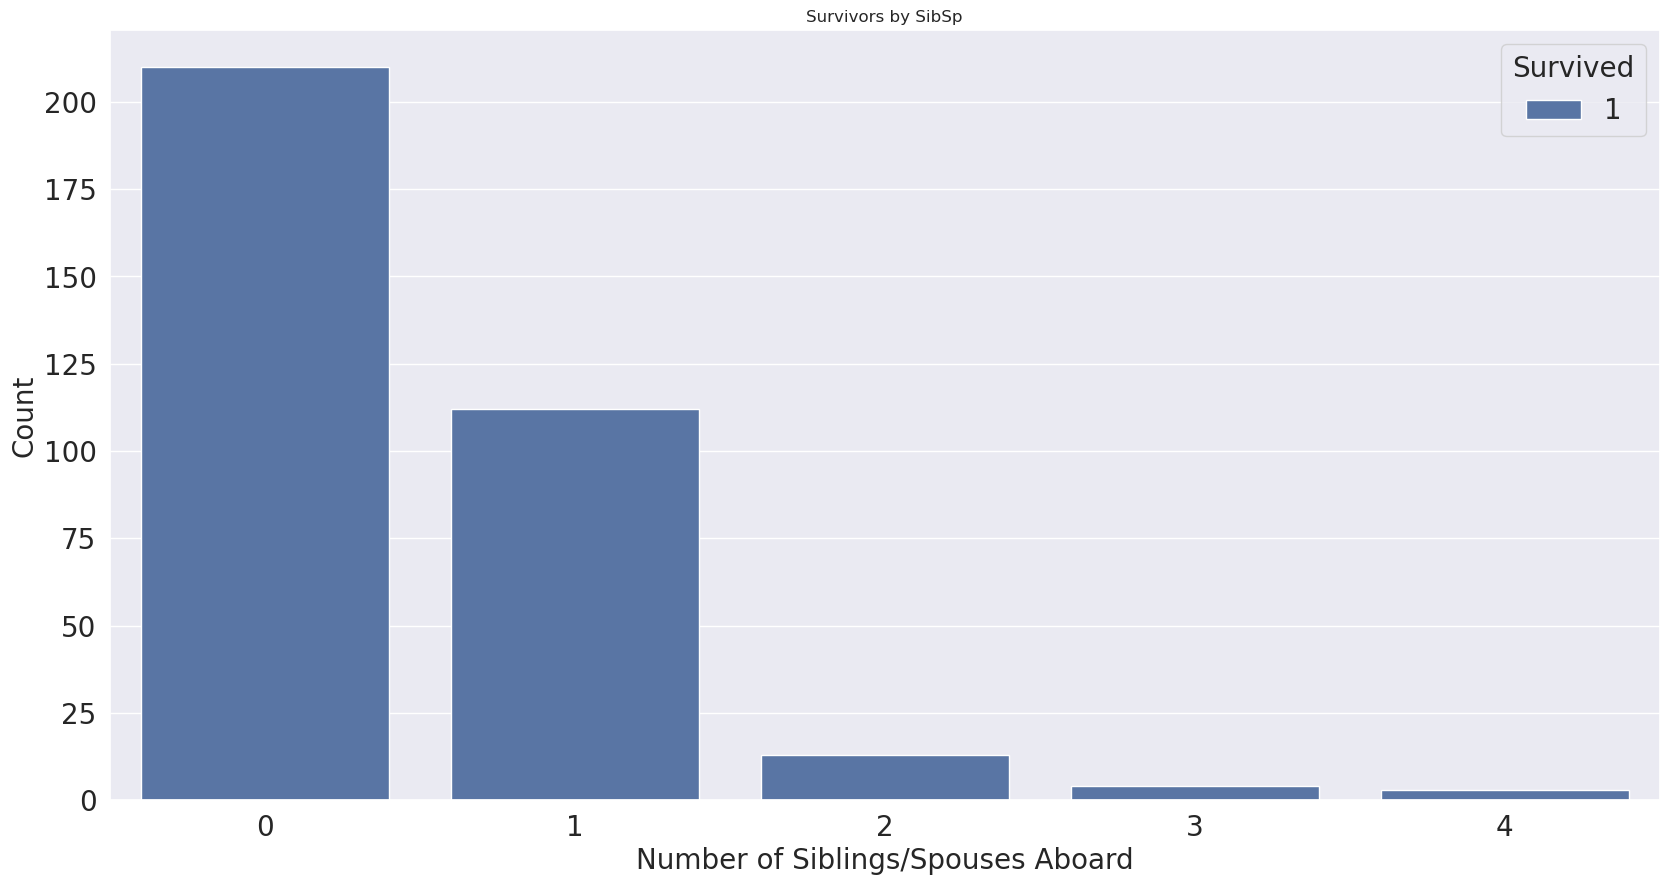

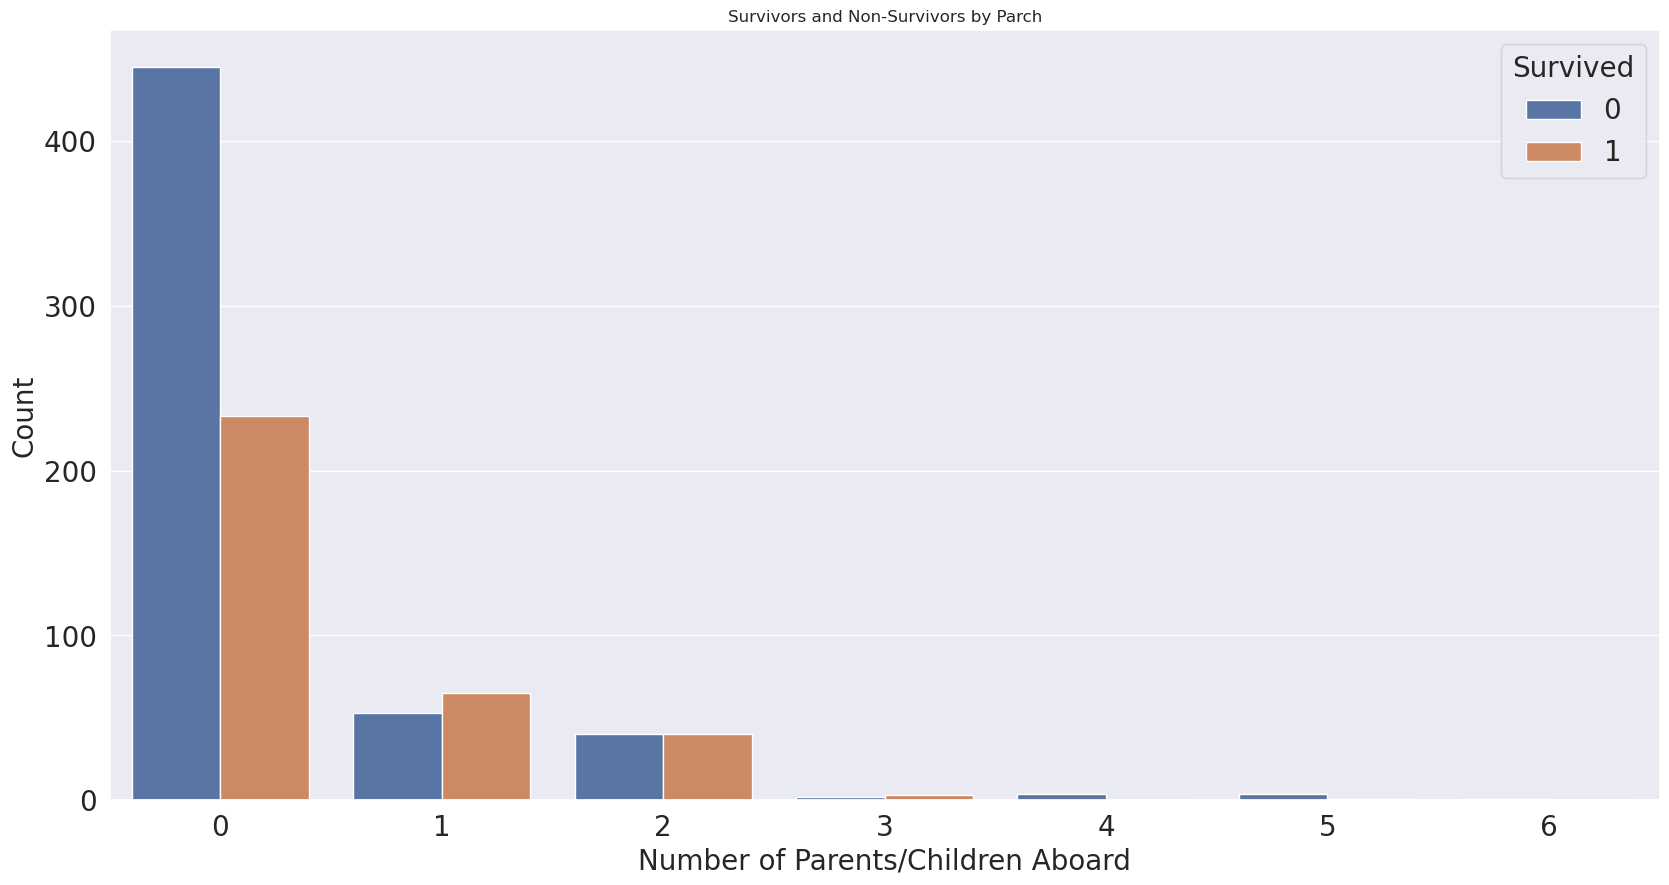

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


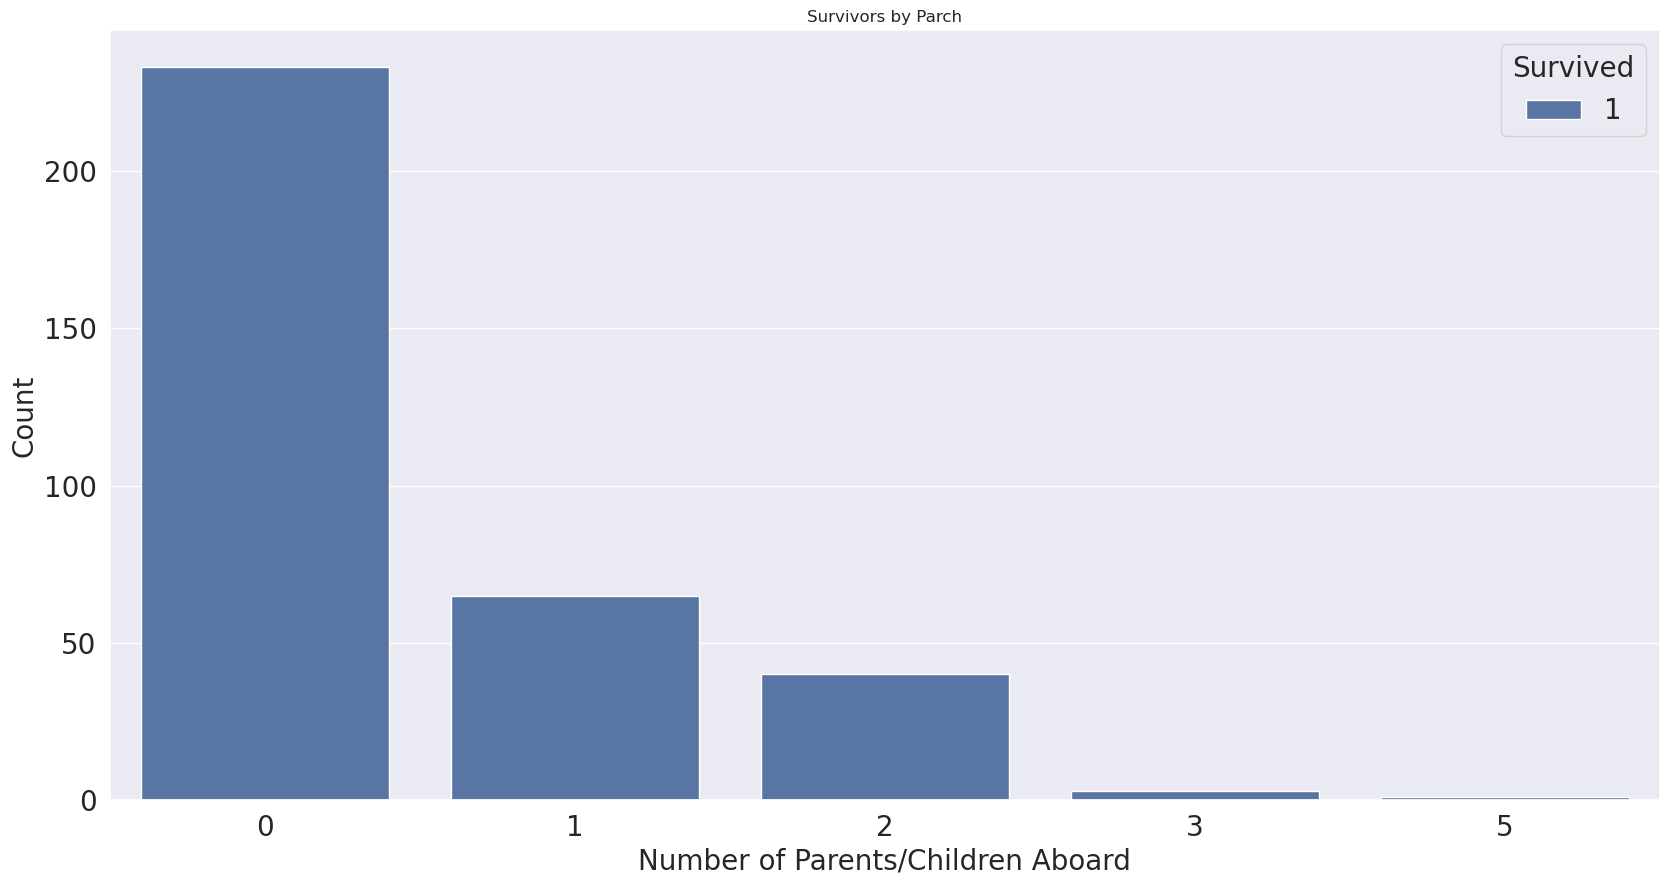

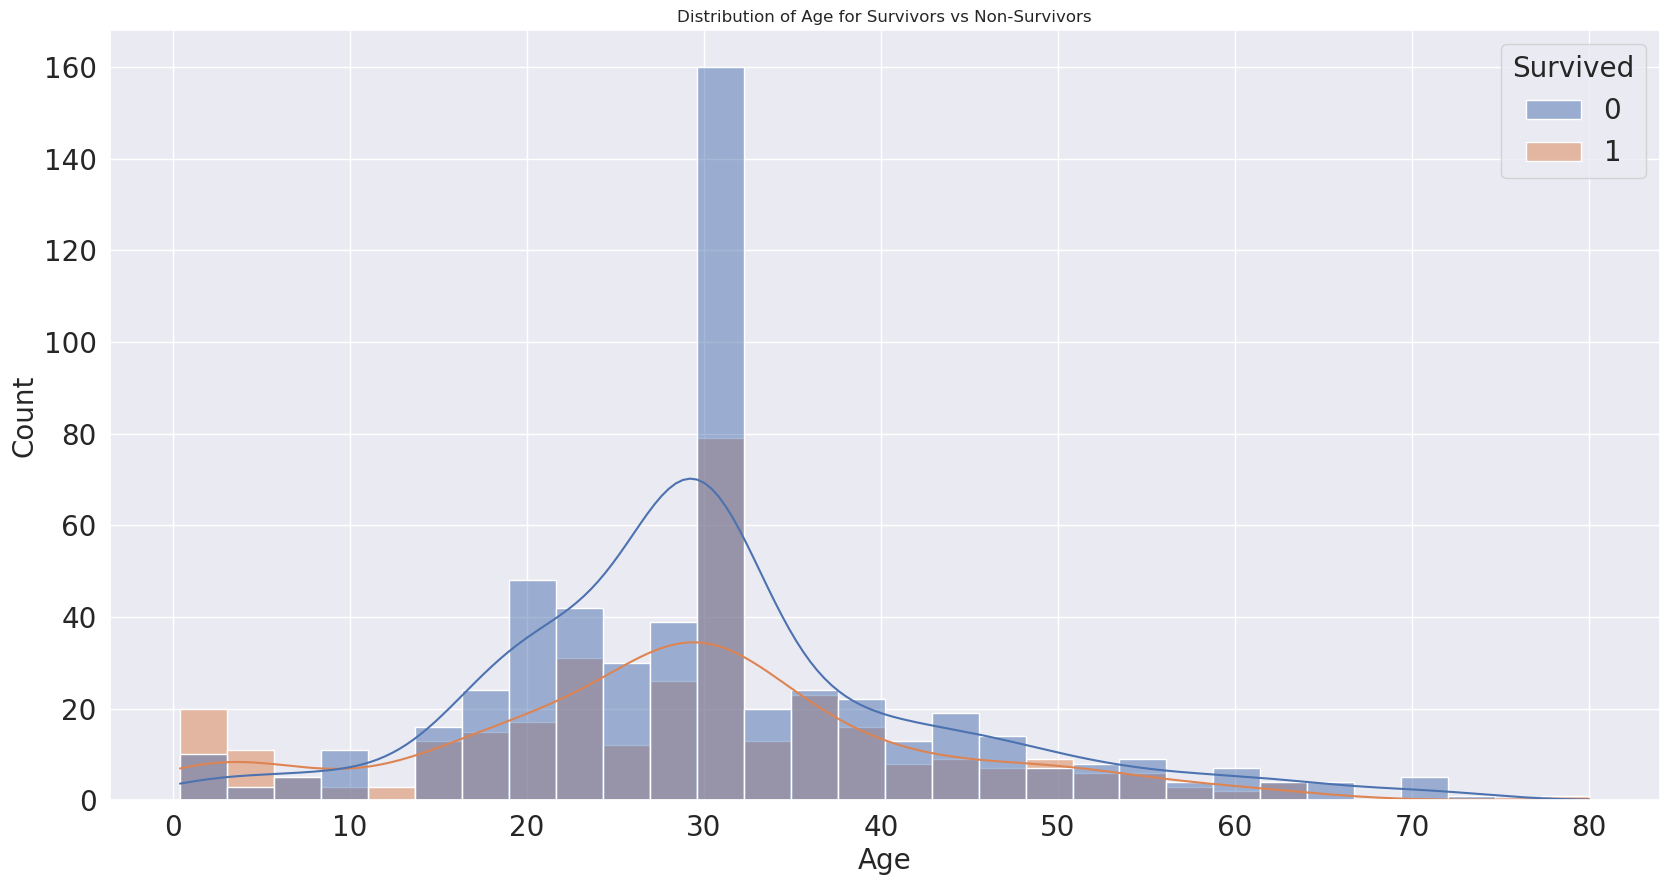

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
84  70.00       0.0
85  70.50       0.0
86  71.00       0.0
87  74.00       0.0
88  80.00       1.0

[89 rows x 2 columns]


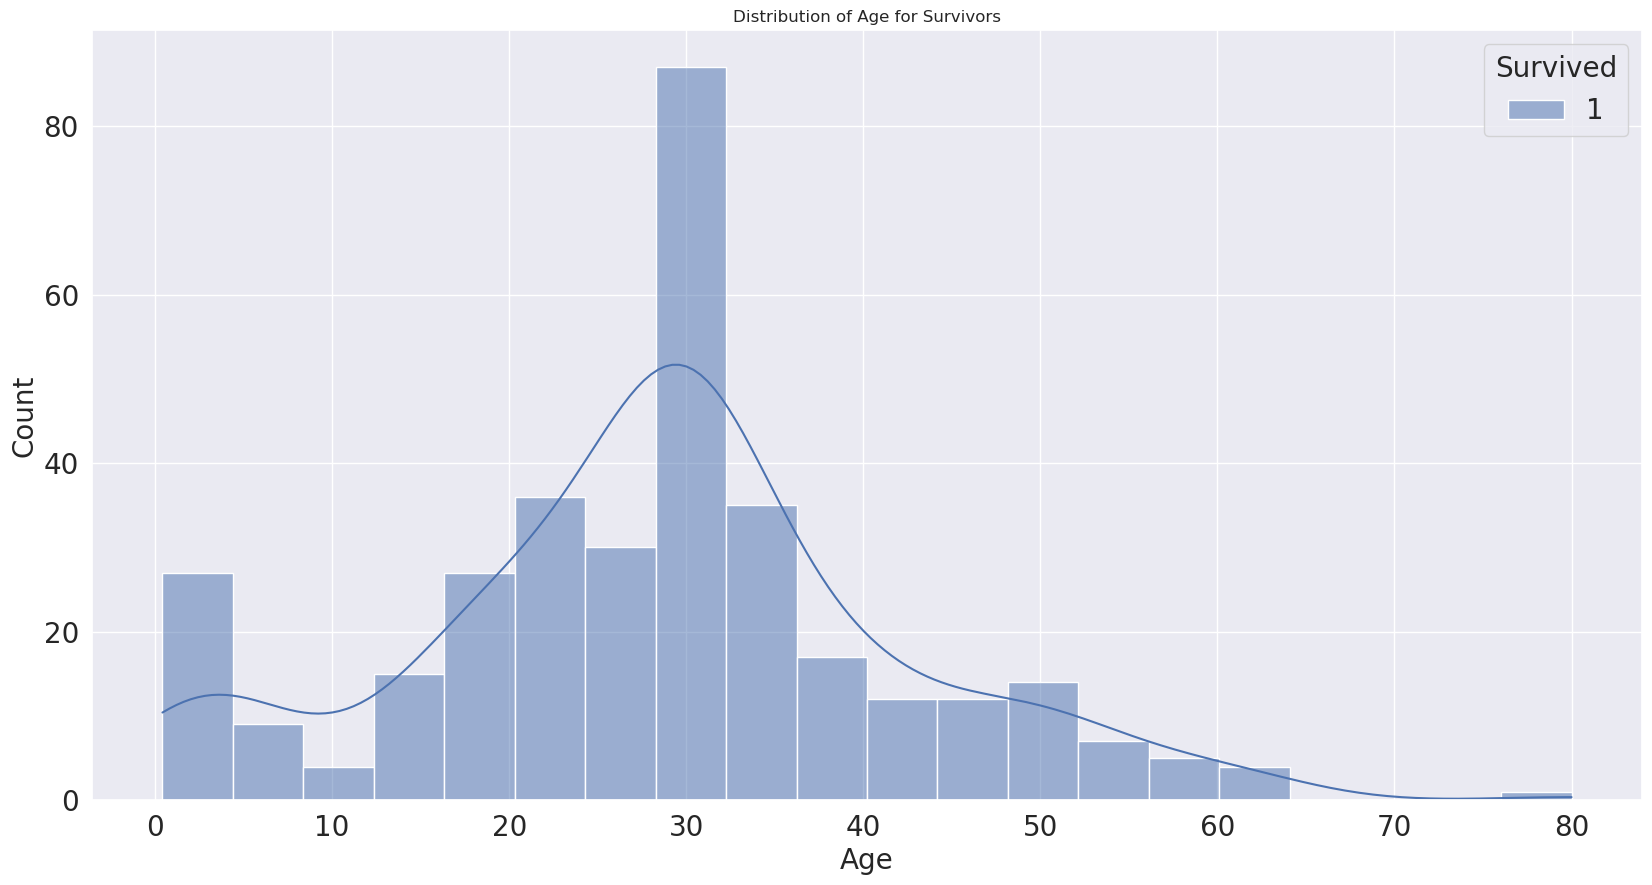

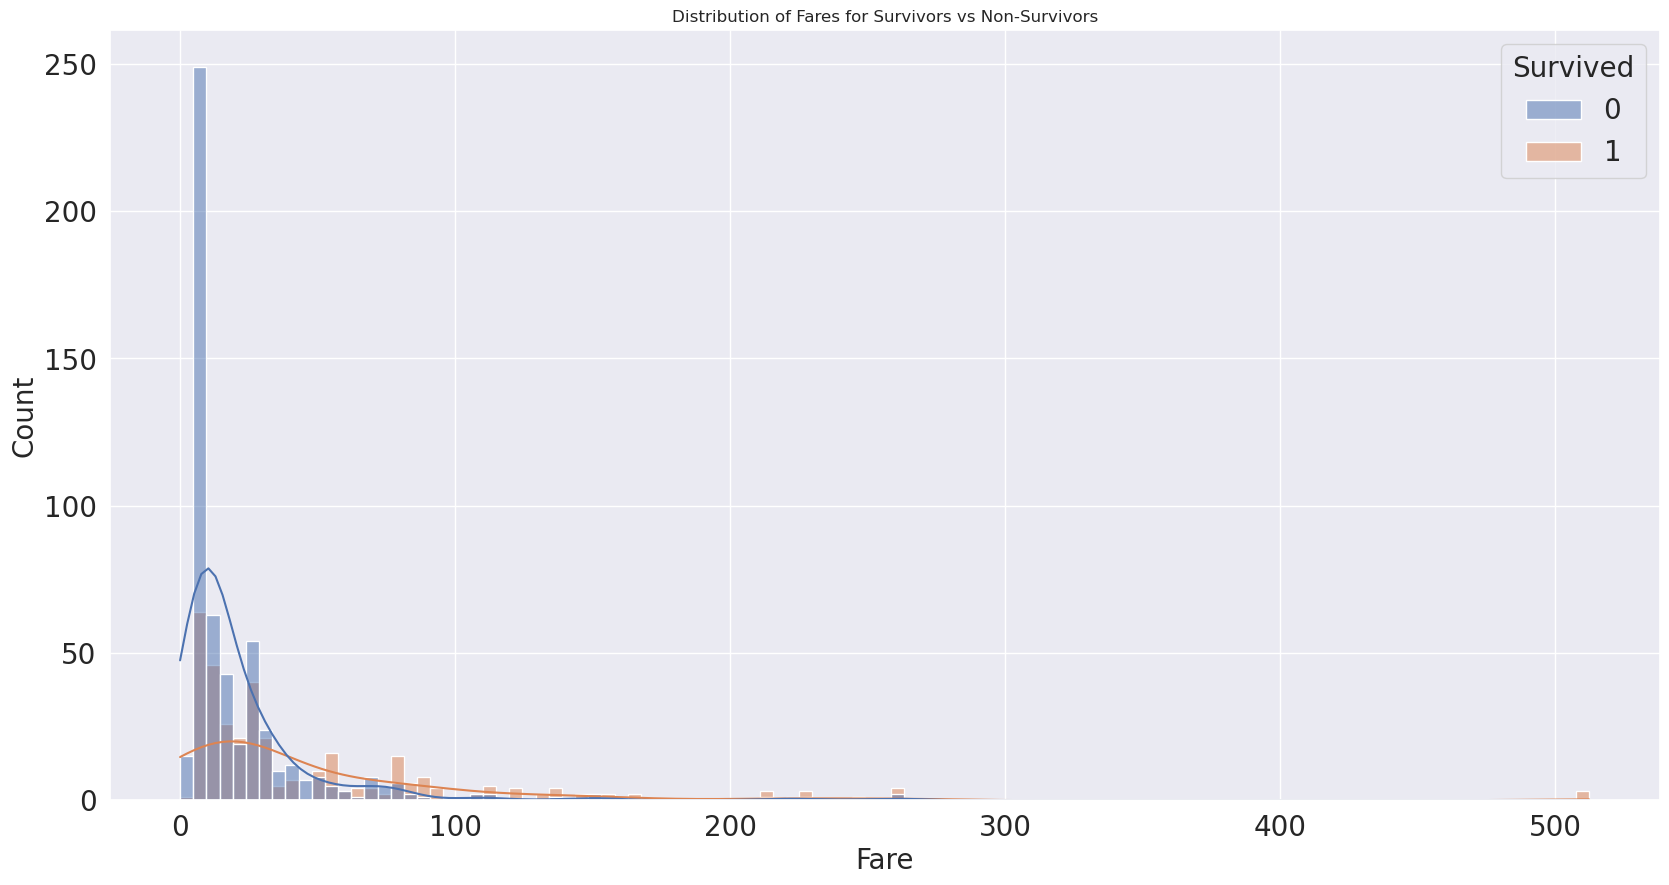

         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
..        ...       ...
243  227.5250  0.750000
244  247.5208  0.500000
245  262.3750  1.000000
246  263.0000  0.500000
247  512.3292  1.000000

[248 rows x 2 columns]


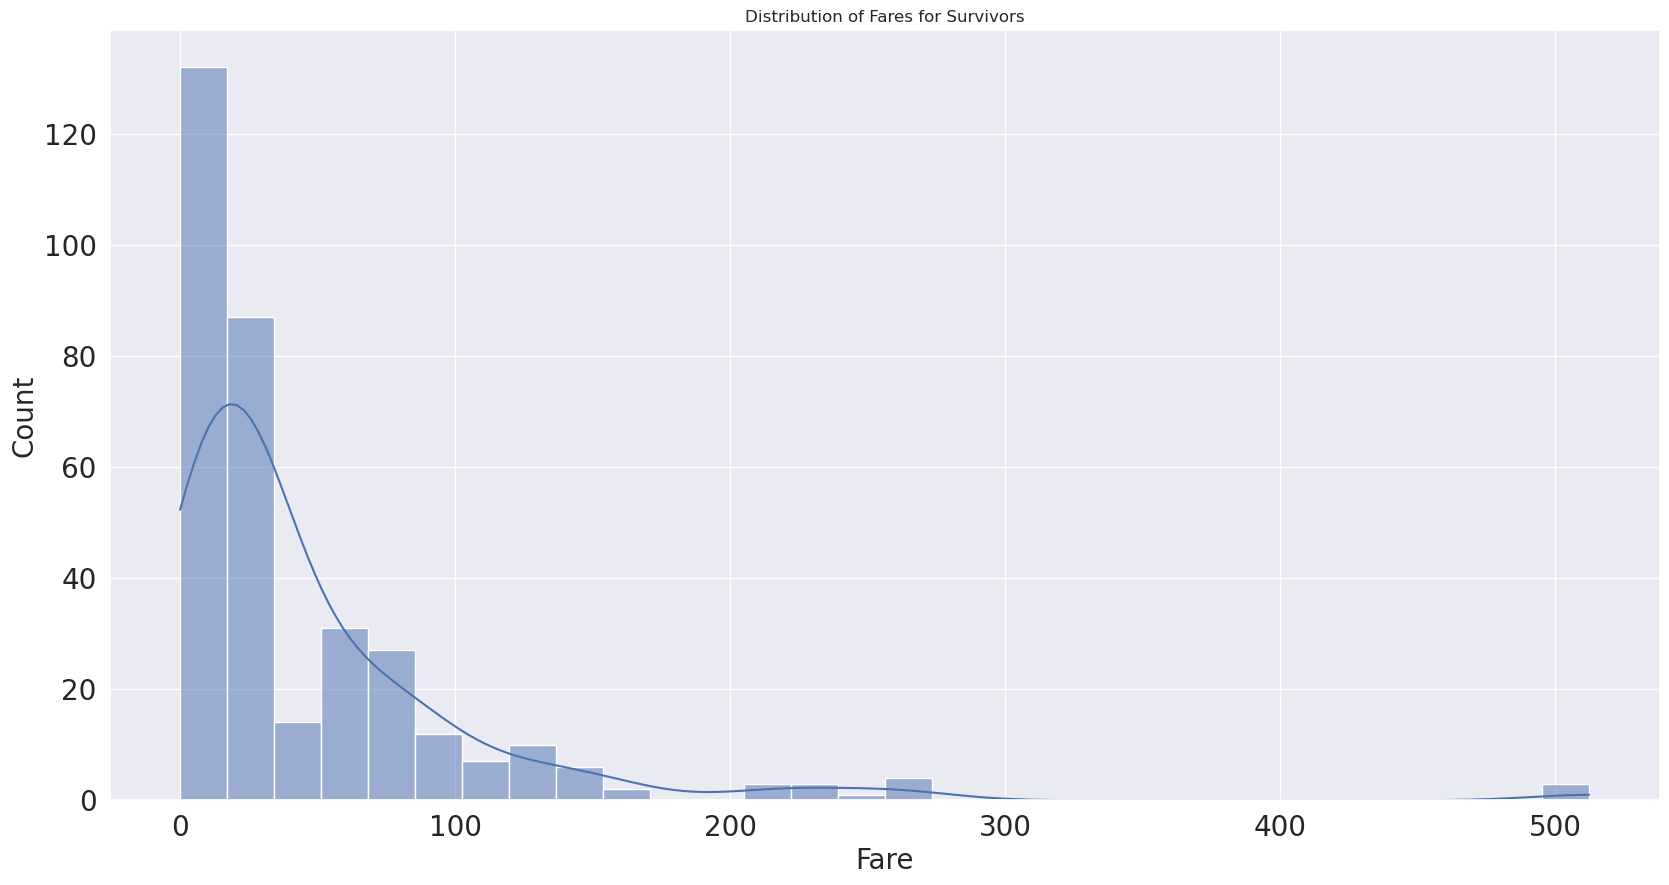

In [14]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the altered Titanic dataset copy 
# titanic_df = altered_titanic_df.copy()

# Create a subset of the dataset where Survived = 1 to be used to make some areas more clear 
survived_df = altered_titanic_df[altered_titanic_df['Survived'] == 1]

# Create bar chart showing the count of survivors and non-survivors
sns.countplot(x='Survived', data=altered_titanic_df)
plt.title('Survivors vs Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
survive_average = altered_titanic_df[['Survived']].mean()
print(survive_average)



# Create bar chart showing the count of survivors and non-survivors by sex
sns.countplot(x='Survived', hue='Sex', data=altered_titanic_df)
plt.title('Survivors vs Non-Survivors by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
sex_survived_average = altered_titanic_df[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean()
print(sex_survived_average)
sns.countplot(x='Survived', hue='Sex', data=survived_df)
plt.title('Survivors by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



# Create bar chart showing the count of survivors and non-survivors by class
sns.countplot(x='Survived', hue='Pclass', data=altered_titanic_df)
plt.title('Survivors vs Non-Survivors by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
# Add explain what is Pclass
plt.text(0.9, 0.95, """Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower""", fontsize=14, ha='center', va='center', transform=plt.gcf().transFigure)
plt.show()
pclass_survived_average = altered_titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
print(pclass_survived_average)
sns.countplot(x='Survived', hue='Pclass', data=survived_df)
plt.title('Survivors by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
# Add explain what is Pclass
plt.text(0.9, 0.95, """Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower""", fontsize=14, ha='center', va='center', transform=plt.gcf().transFigure)
plt.show()



# # Create bar chart showing the count of survivors and non-survivors by port of embarkation
# sns.countplot(x='Survived', hue='Embarked', data=titanic_df)
# plt.title('Survivors vs Non-Survivors by Port of Embarkation')
# plt.xlabel('Survived')
# plt.ylabel('Count')
# plt.show()
# embarked_survived_average = titanic_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
# print(embarked_survived_average)
# sns.countplot(x='Survived', hue='Embarked', data=survived_df)
# plt.title('Survivors by Port of Embarkation')
# plt.xlabel('Survived')
# plt.ylabel('Count')
# plt.show()

# Set the order of the categories
embarked_order = ['C', 'Q', 'S']
# Create bar chart showing the count of survivors and non-survivors by port of embarkation
sns.countplot(x='Survived', hue='Embarked', data=altered_titanic_df, order=[0,1], hue_order=embarked_order, palette='Set2')
plt.title('Survivors vs Non-Survivors by Port of Embarkation')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Get the average survival rate by port of embarkation
embarked_survived_average = altered_titanic_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
print(embarked_survived_average)
# Create bar chart showing the count of survivors by port of embarkation
sns.countplot(x='Survived', hue='Embarked', data=survived_df, order=[1], hue_order=embarked_order, palette='Set2')
plt.title('Survivors by Port of Embarkation')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



# Count plot of Survived vs SibSp
sns.countplot(x='SibSp', hue='Survived', data=altered_titanic_df)
plt.title('Survivors and Non-Survivors by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()
sibSp_survived_average = altered_titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
print(sibSp_survived_average)
sns.countplot(x='SibSp', hue='Survived', data=survived_df)
plt.title('Survivors by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()



# Count plot of Survived vs Parch
sns.countplot(x='Parch', hue='Survived', data=altered_titanic_df)
plt.title('Survivors and Non-Survivors by Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()
parch_survived_average = altered_titanic_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
print(parch_survived_average)
sns.countplot(x='Parch', hue='Survived', data=survived_df)
plt.title('Survivors by Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()



# Create histogram showing the distribution of Age for survivors and non-survivors
sns.histplot(x='Age', hue='Survived', data=altered_titanic_df, kde=True)
plt.title('Distribution of Age for Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
age_survived_average = altered_titanic_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
print(age_survived_average)
# Create histogram showing the distribution of Age for the survivors
sns.histplot(x='Age', hue='Survived', data=survived_df, kde=True)
plt.title('Distribution of Age for Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



# Create histogram showing the distribution of fares for survivors and non-survivors
sns.histplot(x='Fare', hue='Survived', data=altered_titanic_df, kde=True)
plt.title('Distribution of Fares for Survivors vs Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()
fare_survived_average = altered_titanic_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()
print(fare_survived_average)
# Create histogram showing the distribution of fares for the survivors
sns.histplot(x='Fare', data=survived_df, bins=30, kde=True)
plt.title('Distribution of Fares for Survivors')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

## **Conclutions of first iteration of data exploring:**

    1. We can see females have a higher chance of survival than males.
    2. We see that people who are in pclass 1 have also a higher chance of survival (upper class)
    3. We can see that 
        (most people survived in 'S' but the most percent of people survived in 'C'
        and the least percent of people who survived where in 'S')
    4. Sibsp in genral lower amount of 'Sibsp' higher percentage to live
    5. The 'Parch' data has close results to 'Sibsp' data
    6. Maybe there is a corelation between 'Parch' and 'Sibsp'
    7. Age is a numeric value divided to a big range but small amount of people -> maybe should make into groups later
    8. Small children, (ages 0-5) and young adults (age around 30) have higher chance of survival
    9. Fare data should be normilized
    10. Need to encode sex and embarked data.

In [15]:
altered_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


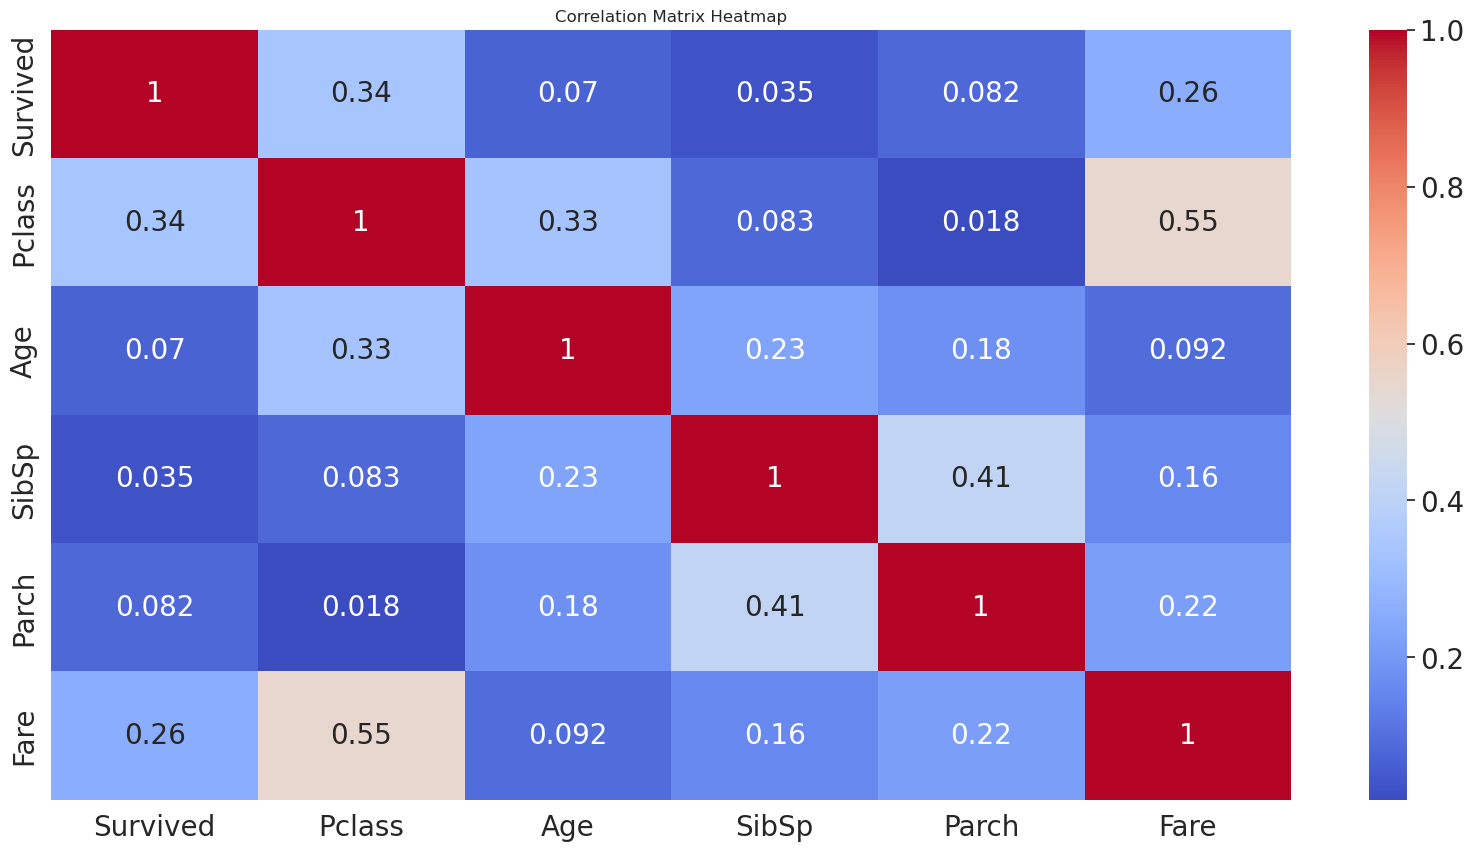

In [16]:
# Create a correlation matrix of the absolute value of the numerical columns
corr_matrix = np.abs(altered_titanic_df.corr())
# corr_matrix = (titanic_train_original.corr())


# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Set the chart title
plt.title('Correlation Matrix Heatmap')
# Show the chart
plt.show()

### **Intresting from the data:**
* Strong corelation (above 0.3) between (Pclass and fare), (Parch and SibSp), (Pclass and Age), (Survived and Pclass), (Age and Pclass)
* Smaller corelation (under 0.3), yet intersting between (Survive and fare)

### **Pclass and Fare**: 
* A proxy for socio-economic status (SES) and How much money the passenger has paid for the travel journey.
* Sounds reasonable that if you are of a higher SES than you would buy a better ticket.
* Lets check the correlation 

# **STEP 3: Data preparation**

In [17]:
# Load the copy of the altered_titanic_df
altered_preparation_titanic_df = altered_titanic_df.copy()

## **Features to normalized (numeric)**

        1. Age
        2. Fare
        3. Sibsp
        4. Parch

In [18]:
# use min-max Normalization
# Define the features to normalize
features_to_normalize = ['Age', 'Fare', 'SibSp', 'Parch']

for feature in features_to_normalize:
    altered_preparation_titanic_df[feature] = MinMaxScaler().fit_transform(altered_preparation_titanic_df[[feature]])
altered_preparation_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,0.125,0.0,0.014151,S
1,1,1,female,0.472229,0.125,0.0,0.139136,C
2,1,3,female,0.321438,0.000,0.0,0.015469,S
3,1,1,female,0.434531,0.125,0.0,0.103644,S
4,0,3,male,0.434531,0.000,0.0,0.015713,S


## **Encoding the data of 'Sex', 'Pclass' and 'Embarked'**

    We prepare the encoding using all three methods of encoding for later

In [19]:
df_cat = altered_preparation_titanic_df[['Embarked']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=enc.get_feature_names_out())
altered_preparation_titanic_df = altered_preparation_titanic_df.drop(['Embarked'], axis=1).join(cat_enc)

df_cat1 = altered_preparation_titanic_df[['Sex']]
cat_enc1 = pd.DataFrame(enc.fit_transform(df_cat1), columns=enc.get_feature_names_out())
altered_preparation_titanic_df = altered_preparation_titanic_df.drop(['Sex'], axis=1).join(cat_enc1)

df_cat2 = altered_preparation_titanic_df[['Pclass']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc2 = pd.DataFrame(enc.fit_transform(df_cat2), columns=enc.get_feature_names_out())
altered_preparation_titanic_df = altered_preparation_titanic_df.drop(['Pclass'], axis=1).join(cat_enc2)

# altered_preparation_titanic_df['Sex'] = altered_preparation_titanic_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
altered_preparation_titanic_df

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,0.271174,0.125,0.000000,0.014151,0.0,1.0,1.0,0.0,1.0
1,1,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0
2,1,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
3,1,0.434531,0.125,0.000000,0.103644,0.0,1.0,0.0,0.0,0.0
4,0,0.434531,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.025374,0.0,1.0,1.0,1.0,0.0
887,1,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0
888,0,0.367921,0.125,0.333333,0.045771,0.0,1.0,0.0,0.0,1.0
889,1,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0


## **Find corealations with survived**

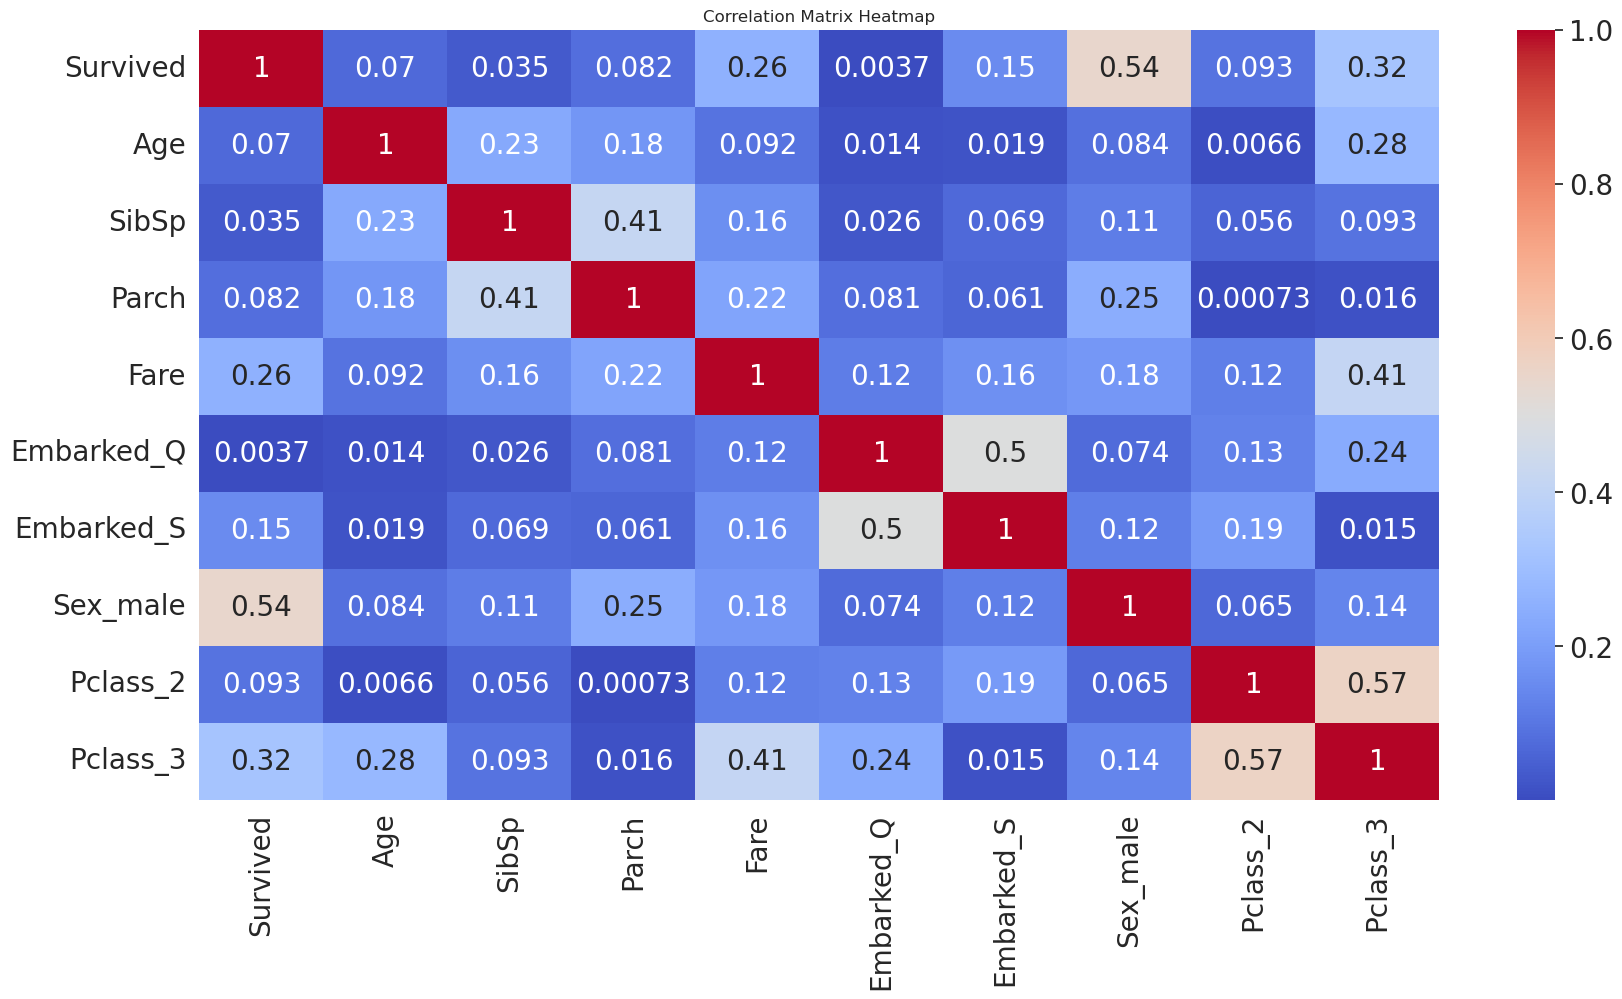

In [20]:
# Create a correlation matrix of the absolute value of the numerical columns
corr_matrix = np.abs(altered_preparation_titanic_df.corr())
# corr_matrix = (titanic_train_original.corr())


# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Set the chart title
plt.title('Correlation Matrix Heatmap')
# Show the chart
plt.show()

In [21]:
check_pclass_with_Fare_df = survived_df.groupby(['Pclass'])['Fare'].mean() # ['Fare'].mean()
print(check_pclass_with_Fare_df.head())
check_pclass_with_Fare_df = survived_df.groupby(['Pclass'])['Fare'].median() # ['Fare'].mean()
print(check_pclass_with_Fare_df.head())


Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64
Pclass
1    77.9583
2    21.0000
3     8.5167
Name: Fare, dtype: float64


### We can see that from the survived data most of the higher paying people where from Pclass 1 and paid quiet alot more
### Maybe we can add this information as a new feature later 

# TODO continue data prep with new features and shit

# Pre Processing

In [22]:
print(titanic_test_original.count(), end='\n\n')
print(titanic_test_original.describe(), end='\n\n')
titanic_test_original.head()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#if nan exists in columns
print(titanic_test_original.isna().any(), end='\n\n')
#sum the number of nan values in each column ('feature')
titanic_test_original.isnull().sum()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Fixing test data to match train data

*       lets fix the test data to have the same changes as the train data

## 1 -> Features to drop 

    1. There are a total of 418 lines in the test data
    2. We have 86 null values in Age -> we can fill it up with the mean age in order not to "disort" the data
    3. We have 327 null values in Cabin -> To much missing data, droping this feature.
    4. We have 1 null values in Fare -> Will fill up randomly.
    5. No real connection between 'PassengerId' feature and the chance of survival. -> need this for submision.
    6. The name of the passanger dosnt change his chance of survival. -> droping this feature.
    7. The 'Ticket' feature dosnt hold any data that will help us to predict the chance of survival. -> droping this feature.
    

## 2 -> Features to normalized (numeric)

    1. Age
    2. Fare
    3. Sibsp
    4. Parch
        
## 3 -> Encoding the data of 'Sex', 'Pclass' and 'Embarked'

*       We prepare the encoding using all three methods of encoding for later
        
        

In [24]:
# Load the Titanic dataset copy 
altered_titanic_test_df = titanic_test_original.copy()


# Calculate mean age
mean_age = np.mean(altered_titanic_test_df['Age'].dropna())
# Fill null values with mean age
altered_titanic_test_df['Age'].fillna(mean_age, inplace=True)


# Get possible values for Embarked
mean_fare = np.mean(altered_titanic_test_df['Fare'].dropna())
# Replace null values with random values from possible_values
altered_titanic_test_df['Fare'].fillna(mean_age, inplace=True)


# Drop the unnecessary columns
altered_titanic_test_df = altered_titanic_test_df.drop('Cabin', axis=1)
altered_titanic_test_df = altered_titanic_test_df.drop('Name', axis=1)
# altered_titanic_test_df = altered_titanic_test_df.drop('PassengerId', axis=1)
altered_titanic_test_df = altered_titanic_test_df.drop('Ticket', axis=1)

#sum the number of nan values in each column ('feature')
print(altered_titanic_test_df.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [25]:
# use min-max Normalization
# Define the features to normalize
# features_to_normalize = ['Age', 'Fare', 'SibSp', 'Parch']

for feature in features_to_normalize:
    altered_titanic_test_df[feature] = MinMaxScaler().fit_transform(altered_titanic_test_df[[feature]])
altered_titanic_test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,0.452723,0.000,0.000000,0.015282,Q
1,893,3,female,0.617566,0.125,0.000000,0.013663,S
2,894,2,male,0.815377,0.000,0.000000,0.018909,Q
3,895,3,male,0.353818,0.000,0.000000,0.016908,S
4,896,3,female,0.287881,0.125,0.111111,0.023984,S


In [26]:
df_cat = altered_titanic_test_df[['Embarked']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=enc.get_feature_names_out())
altered_titanic_test_df = altered_titanic_test_df.drop(['Embarked'], axis=1).join(cat_enc)

df_cat1 = altered_titanic_test_df[['Sex']]
cat_enc1 = pd.DataFrame(enc.fit_transform(df_cat1), columns=enc.get_feature_names_out())
altered_titanic_test_df = altered_titanic_test_df.drop(['Sex'], axis=1).join(cat_enc1)

df_cat2 = altered_titanic_test_df[['Pclass']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc2 = pd.DataFrame(enc.fit_transform(df_cat2), columns=enc.get_feature_names_out())
altered_titanic_test_df = altered_titanic_test_df.drop(['Pclass'], axis=1).join(cat_enc2)

# altered_preparation_titanic_df['Sex'] = altered_preparation_titanic_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
altered_titanic_test_df

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,892,0.452723,0.000,0.000000,0.015282,1.0,0.0,1.0,0.0,1.0
1,893,0.617566,0.125,0.000000,0.013663,0.0,1.0,0.0,0.0,1.0
2,894,0.815377,0.000,0.000000,0.018909,1.0,0.0,1.0,1.0,0.0
3,895,0.353818,0.000,0.000000,0.016908,0.0,1.0,1.0,0.0,1.0
4,896,0.287881,0.125,0.111111,0.023984,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,0.396975,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0
414,1306,0.512066,0.000,0.000000,0.212559,0.0,0.0,0.0,0.0,0.0
415,1307,0.505473,0.000,0.000000,0.014151,0.0,1.0,1.0,0.0,1.0
416,1308,0.396975,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0


In [27]:
print(altered_titanic_test_df.count(), end='\n\n')
print(altered_titanic_test_df.describe(), end='\n\n')
altered_titanic_test_df.head()

PassengerId    418
Age            418
SibSp          418
Parch          418
Fare           418
Embarked_Q     418
Embarked_S     418
Sex_male       418
Pclass_2       418
Pclass_3       418
dtype: int64

       PassengerId         Age       SibSp       Parch        Fare  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.396975    0.055921    0.043594    0.069515   
std     120.810458    0.166617    0.112095    0.109048    0.108995   
min     892.000000    0.000000    0.000000    0.000000    0.000000   
25%     996.250000    0.301068    0.000000    0.000000    0.015412   
50%    1100.500000    0.396975    0.000000    0.000000    0.028213   
75%    1204.750000    0.469207    0.125000    0.000000    0.061429   
max    1309.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_Q  Embarked_S    Sex_male    Pclass_2    Pclass_3  
count  418.000000  418.000000  418.000000  418.000000  418.000000  
mean     0.110048    0.645933

,PassengerId,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,892,0.452723,0.000,0.000000,0.015282,1.0,0.0,1.0,0.0,1.0
1,893,0.617566,0.125,0.000000,0.013663,0.0,1.0,0.0,0.0,1.0
2,894,0.815377,0.000,0.000000,0.018909,1.0,0.0,1.0,1.0,0.0
3,895,0.353818,0.000,0.000000,0.016908,0.0,1.0,1.0,0.0,1.0
4,896,0.287881,0.125,0.111111,0.023984,0.0,1.0,0.0,0.0,1.0


In [28]:
#if nan exists in columns
print(altered_titanic_test_df.isna().any(), end='\n\n')
#sum the number of nan values in each column ('feature')
altered_titanic_test_df.isnull().sum()

PassengerId    False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked_Q     False
Embarked_S     False
Sex_male       False
Pclass_2       False
Pclass_3       False
dtype: bool



PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
Sex_male       0
Pclass_2       0
Pclass_3       0
dtype: int64

# **STEP 4: Modeling**

### **Compare accuracy of different encoding methods** 

Let's train **SGDClassifier** and see which encoding is better for this dataset.  
We will plot bar graphs with Plotly and convert the figures to images using [Get Image as Bytes](https://plotly.com/python/static-image-export/#get-image-as-bytes).  
Then, we will print the image with [IPython.display.Image](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image).  


### **Data Slicing**  
In real life scenerios, we don't have the test data.  
We can not check the performence of the model on the same dataset that the model was trained on.  
This will result in wrong estimation for the model generalization capabilities.   
In order to check our prediction and fine-tune the model parameters, we need to slice the dataset into 2 groups:  
1. train
2. validation

We will train on the train data and check the performance on the validation data.  
We will slice the dataset with Scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  
First, let's split the data to features `X` and target `t`.

In [29]:
# divide the data to features and target
t = altered_preparation_titanic_df['Survived'].copy()
X = altered_preparation_titanic_df.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0.271174,0.125,0.000000,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.000000,0.103644,0.0,1.0,0.0,0.0,0.0
4,0.434531,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,1.0,1.0,1.0,0.0
887,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0
888,0.367921,0.125,0.333333,0.045771,0.0,1.0,0.0,0.0,1.0
889,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0


Now, we can split the data to train and validation.   
We can choose number of values for the `test_size` argument.  
Let's check few of them with NE and MSE.  
We can plot the data with Plotly [scatter](https://plotly.com/python/line-and-scatter/).  

In [30]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [31]:
# plot the score by split and the loss by split
def plot_score_and_loss_by_split(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(
            X.values, t.values, test_size=size/100, random_state=42)
        NE_reg = linear_model.LinearRegression().fit(X_train, t_train)
        y_train = NE_reg.predict(X_train)
        y_val = NE_reg.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size/100] = NE_reg.score(X_train, t_train)
        graph_points['val_R2'][size/100] = NE_reg.score(X_val, t_val)
    print_graphs_r2_mse(graph_points)

plot_score_and_loss_by_split(X, t)

* According to the graphs above, the optimal hyperparameter(test_size) is 0.1
* lets split the original train set to train and test according to this finding

In [32]:
# split the data to train and validation
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(
    X, t, test_size=0.2, random_state=42)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
331,0.566474,0.000,0.000000,0.055628,0.0,1.0,1.0,0.0,0.0
733,0.283740,0.000,0.000000,0.025374,0.0,1.0,1.0,1.0,0.0
382,0.396833,0.000,0.000000,0.015469,0.0,1.0,1.0,0.0,1.0
704,0.321438,0.125,0.000000,0.015330,0.0,1.0,1.0,0.0,1.0
813,0.070118,0.500,0.333333,0.061045,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
106,0.258608,0.000,0.000000,0.014932,0.0,1.0,0.0,0.0,1.0
270,0.367921,0.000,0.000000,0.060508,0.0,1.0,1.0,0.0,0.0
860,0.509927,0.250,0.000000,0.027538,0.0,1.0,1.0,0.0,1.0
435,0.170646,0.125,0.333333,0.234224,0.0,1.0,0.0,0.0,0.0



t_train


331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


X_test


,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
709,0.367921,0.125,0.166667,0.029758,0.0,0.0,1.0,0.0,1.0
439,0.384267,0.000,0.000000,0.020495,0.0,1.0,1.0,1.0,0.0
840,0.246042,0.000,0.000000,0.015469,0.0,1.0,1.0,0.0,1.0
720,0.070118,0.000,0.166667,0.064412,0.0,1.0,0.0,1.0,0.0
39,0.170646,0.125,0.000000,0.021942,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
433,0.208344,0.000,0.000000,0.013907,0.0,1.0,1.0,0.0,1.0
773,0.367921,0.000,0.000000,0.014102,0.0,0.0,1.0,0.0,1.0
25,0.472229,0.125,0.833333,0.061264,0.0,1.0,0.0,0.0,1.0
84,0.208344,0.000,0.000000,0.020495,0.0,1.0,0.0,1.0,0.0



t_test


709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# First method: SGD

In [33]:
# # show the accuracy by model
# hp_models = {'SGDClassifier': SGDClassifier(random_state=1), 'LogisticRegression': LogisticRegression(), 'MLPClassifier': MLPClassifier()}

# def show_accuracy_by_model(X_train, t_train, X_test, t_test, models):
#     accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

#     for model_name, model in models.items():
#         model_pipe = make_pipeline(oe, model)
#         model_pipe.fit(X_train, t_train)
#         accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model_pipe.score(X_train, t_train)]
#         accuracy_df.loc[len(accuracy_df)] = [model_name, 'test', model_pipe.score(X_val, t_val)]

#     fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
#     # img_bytes = fig.to_image(format="png", width=600, height=350, scale=2)
#     # display(Image(img_bytes))

# show_accuracy_by_model(X_train, t_train, X_test, t_test, hp_models)

In [34]:
SGDClassifier = pipeline.make_pipeline(
    preprocessing.StandardScaler(), 
    linear_model.SGDClassifier(loss = "log", 
                               alpha = 0, 
                               learning_rate = "constant", 
                               eta0 = 0.01)).fit(X_train, t_train)

In [35]:
print('Accuracy score on train',
      round(SGDClassifier.score(X_train, t_train) * 100, 2))
print('Accuracy score on test',
      round(SGDClassifier.score(X_test, t_test) * 100, 2))
print()
print('CE on train',
      metrics.log_loss(t_train, SGDClassifier.predict_proba(X_train)))
print('CE on test', 
      metrics.log_loss(t_test, SGDClassifier.predict_proba(X_test)))

Accuracy score on train 80.76
Accuracy score on test 79.89

CE on train 0.44655765332250075
CE on test 0.4259913102886264


# Second method: Logistic Regression

In [36]:
log_reg = LogisticRegression().fit(X_train, t_train)

In [37]:
print('Accuracy score on train',
      round(log_reg.score(X_train, t_train) * 100, 2))
print('Accuracy score on test',
      round(log_reg.score(X_test, t_test) * 100, 2))
print()
print('CE on train',
      metrics.log_loss(t_train, log_reg.predict_proba(X_train)))
print('CE on test', 
      metrics.log_loss(t_test, log_reg.predict_proba(X_test)))

Accuracy score on train 79.78
Accuracy score on test 79.89

CE on train 0.4492020040747702
CE on test 0.434052608973124


# Third method: MLP

In [38]:
mlp_c = neural_network.MLPClassifier(
        activation='logistic',
         solver='sgd', 
         alpha=0, 
         max_iter=10000).fit(X_train, t_train)

In [39]:
print('Accuracy score on train',
      round(mlp_c.score(X_train, t_train) * 100, 2))
print('Accuracy score on test',
      round(mlp_c.score(X_test, t_test) * 100, 2))
print()
print('CE on train',
      metrics.log_loss(t_train, mlp_c.predict_proba(X_train)))
print('CE on test',
      metrics.log_loss(t_test, mlp_c.predict_proba(X_test)))

Accuracy score on train 62.36
Accuracy score on test 58.66

CE on train 0.6582274491012079
CE on test 0.6766560848217239


* The most accurate method should be LR → submiting that option.

In [40]:
X_train = altered_preparation_titanic_df.drop('Survived', axis=1)
t_train = altered_preparation_titanic_df['Survived']

y_pred = SGDClassifier.predict(altered_titanic_test_df.drop("PassengerId", axis=1))

submission = pd.DataFrame({
        "PassengerId": altered_titanic_test_df["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)